In [10]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram

import umap

import pandas as pd


/Users/berk/dev/ml-hw2/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# range 0.01 to 0.1 in 0.01 steps
# range 0.1 to 1 in 0.1 steps
range

TypeError: 'float' object cannot be interpreted as an integer

In [19]:
dataset = pickle.load(open("../datasets/part3_dataset.data", "rb"))
df = pd.DataFrame(dataset)
df.shape


(2004, 3072)

/var/folders/__/hjynx0jj73v627v_ydsgttrc0000gn/T/ipykernel_28274/1772993050.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embedding[:, 0], embedding[:, 1], cmap='viridis')


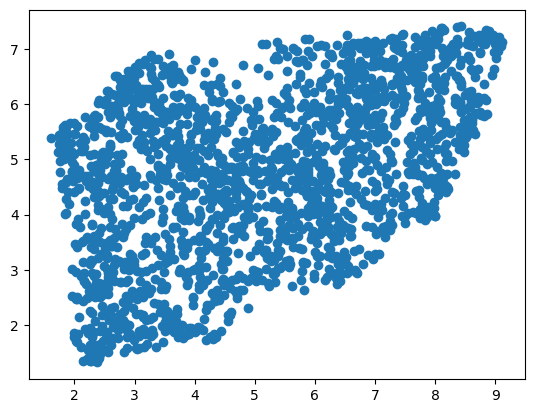

In [18]:
# UMAP
reducer = umap.UMAP(n_components=2)
embedding = reducer.fit_transform(df)

plt.scatter(embedding[:, 0], embedding[:, 1], cmap='viridis')



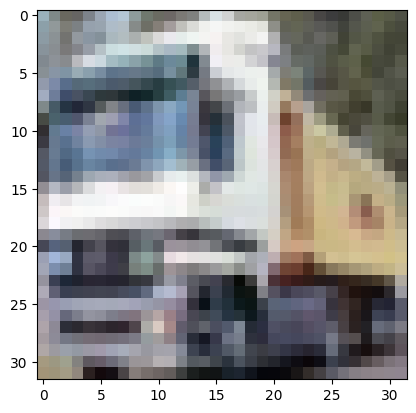

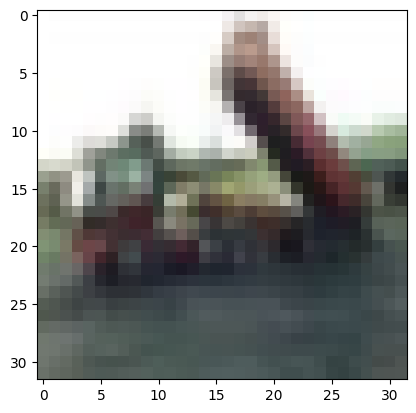

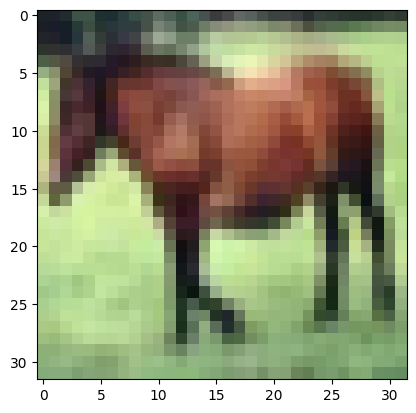

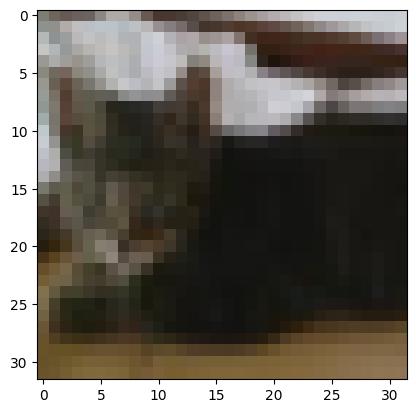

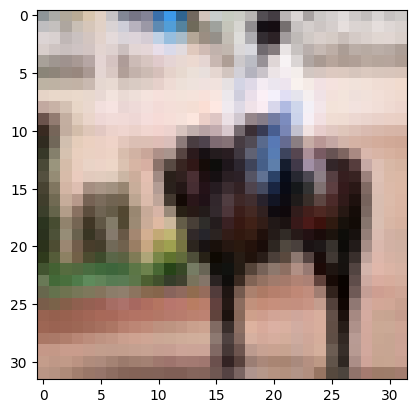

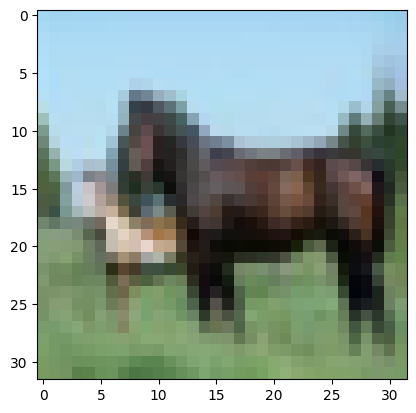

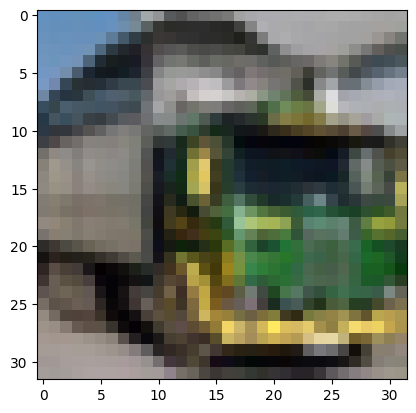

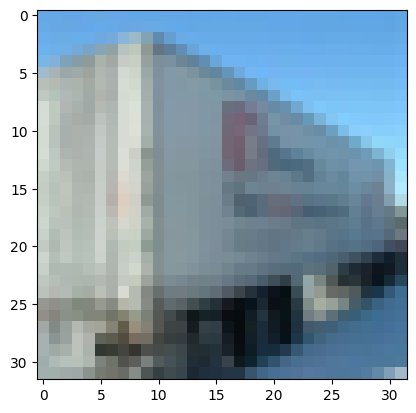

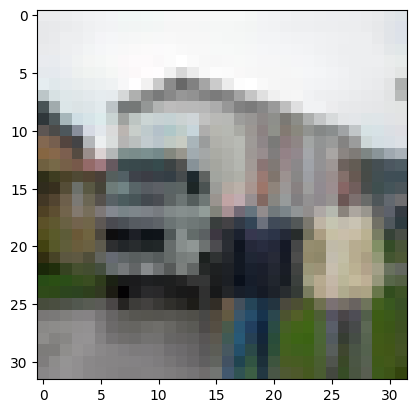

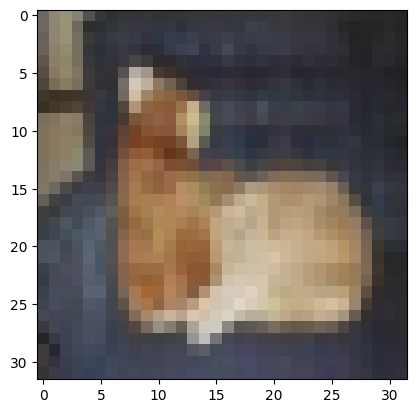

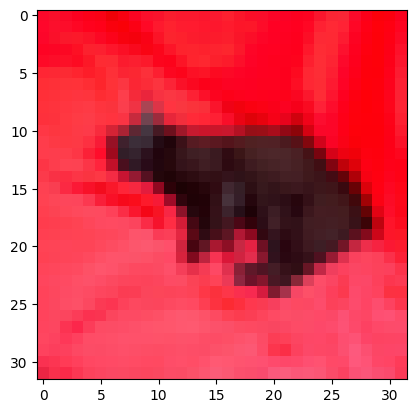

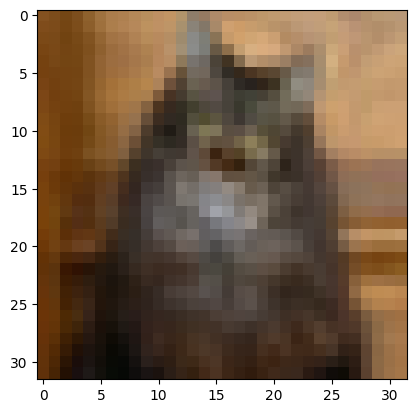

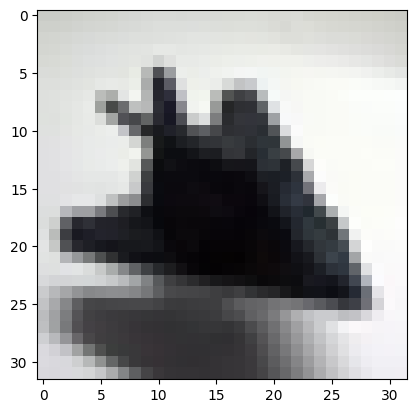

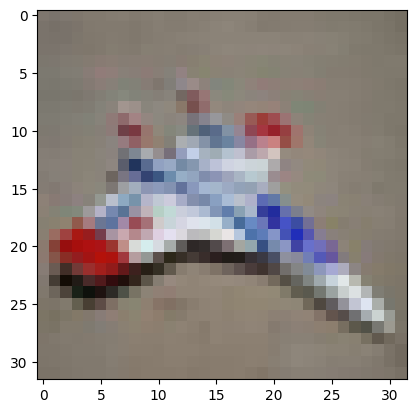

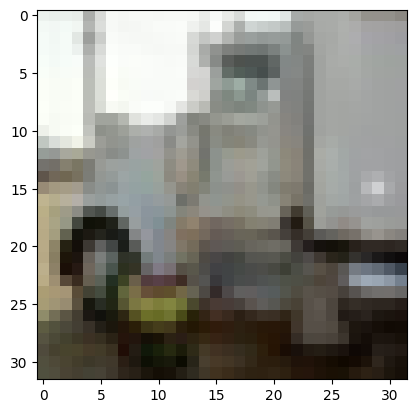

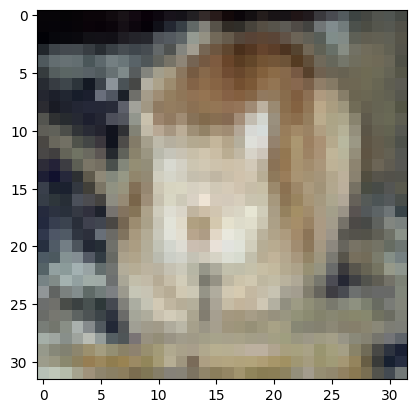

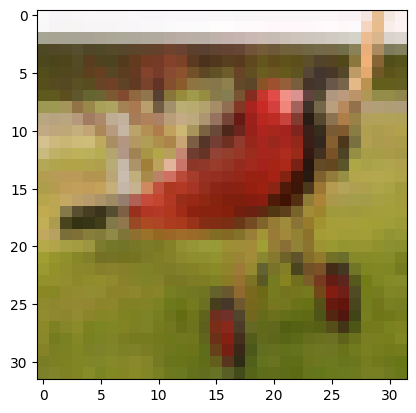

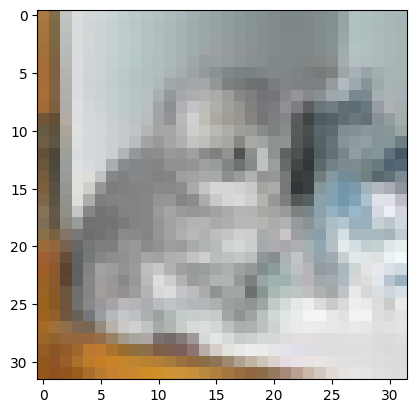

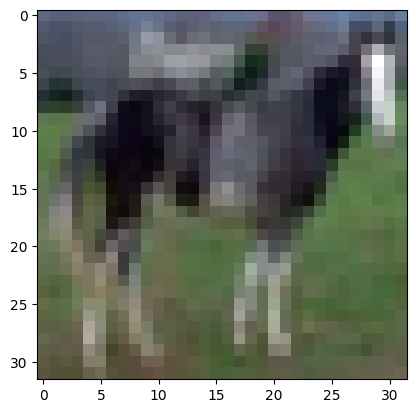

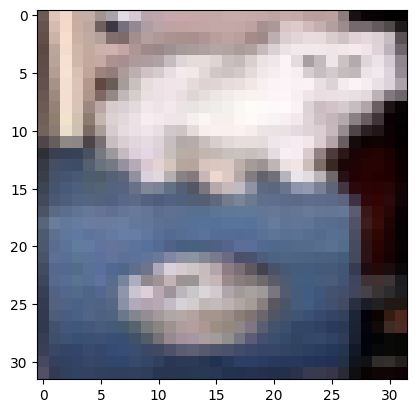

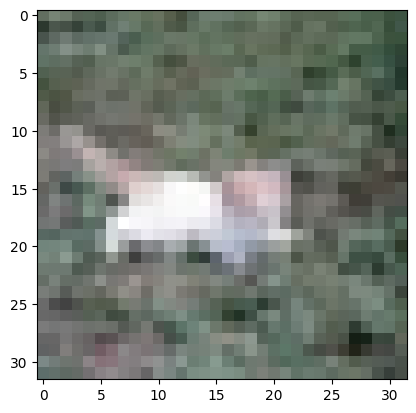

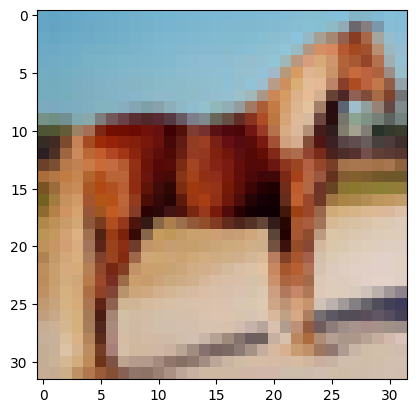

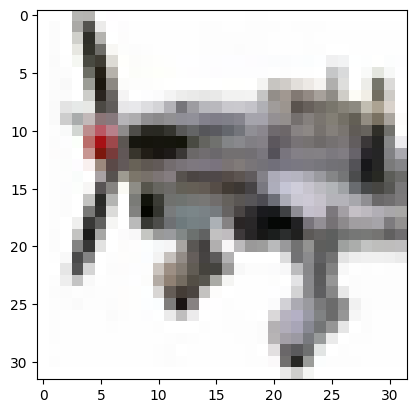

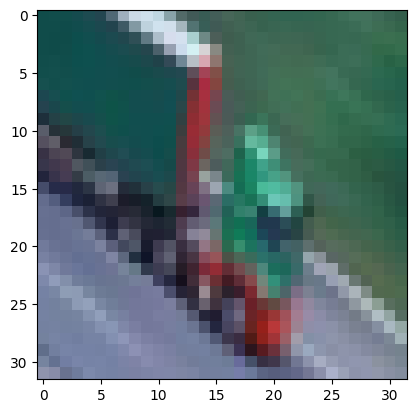

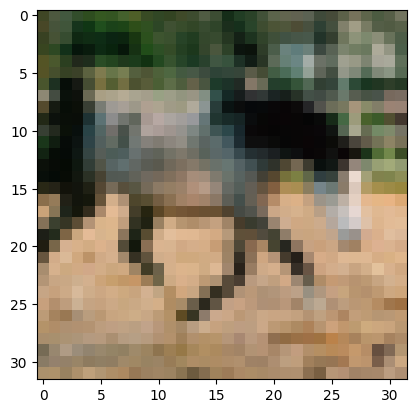

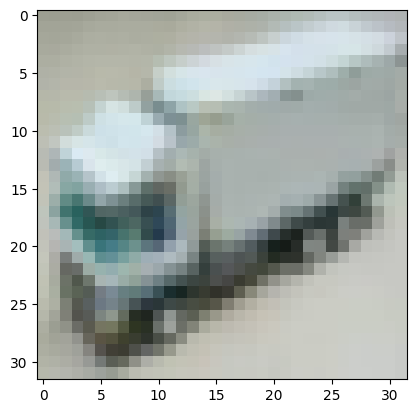

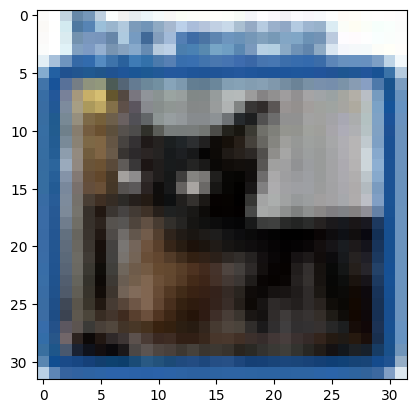

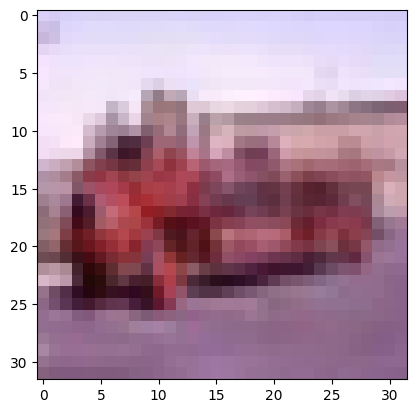

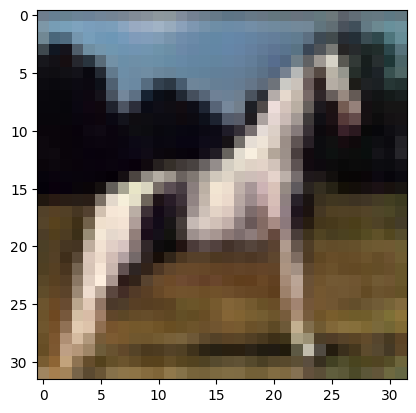

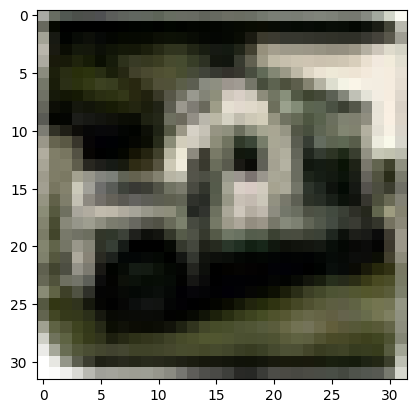

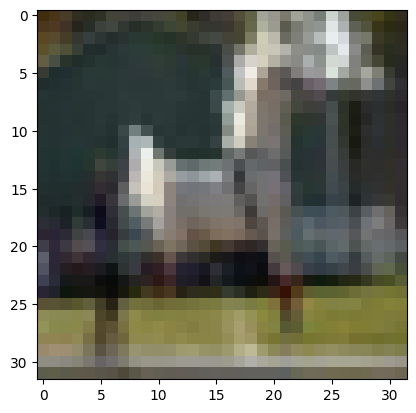

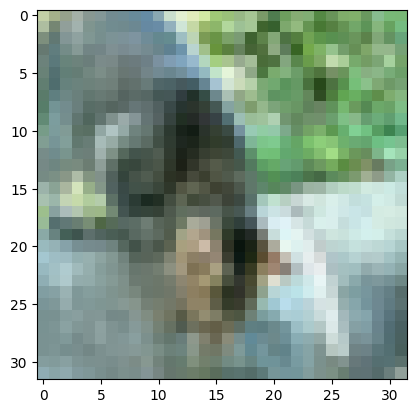

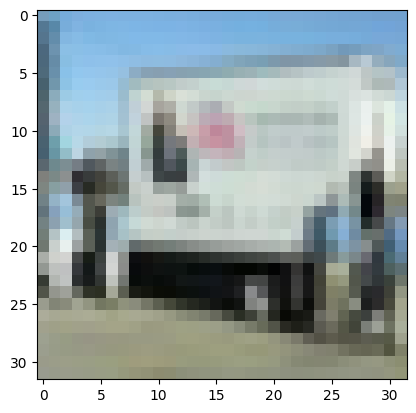

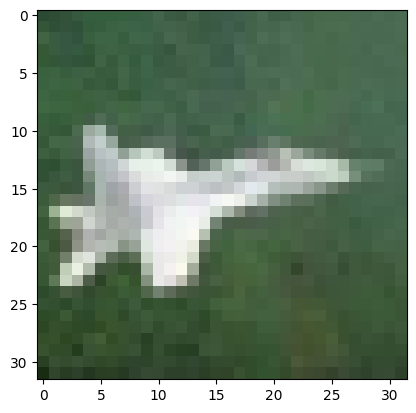

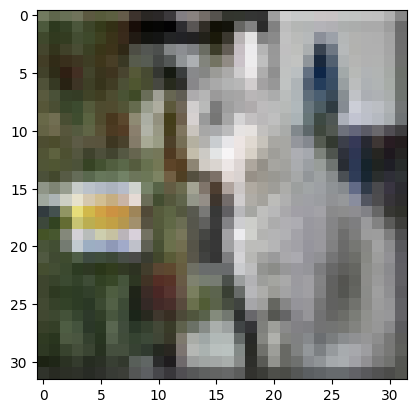

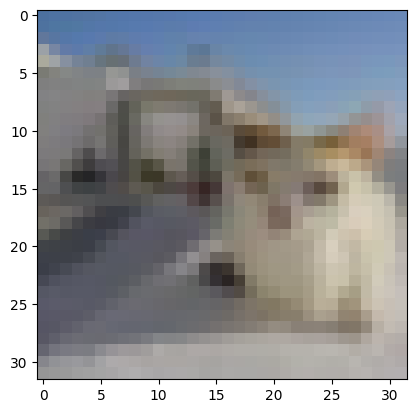

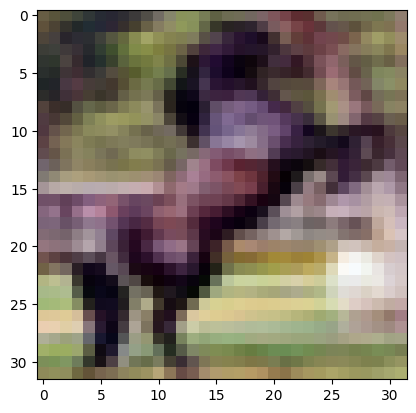

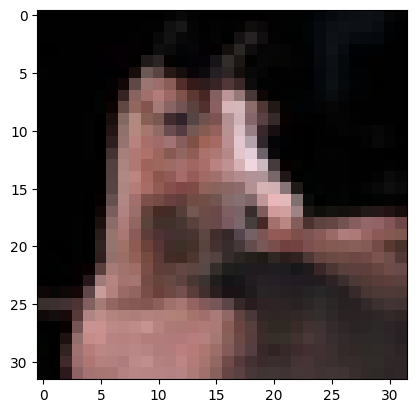

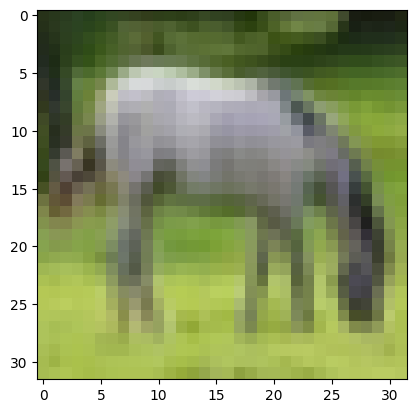

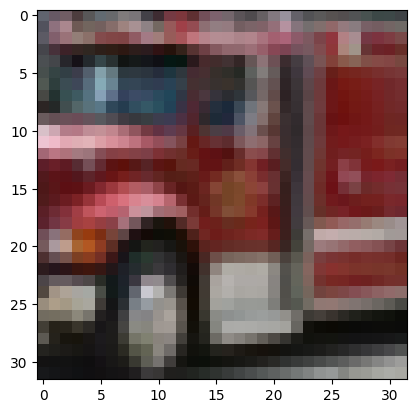

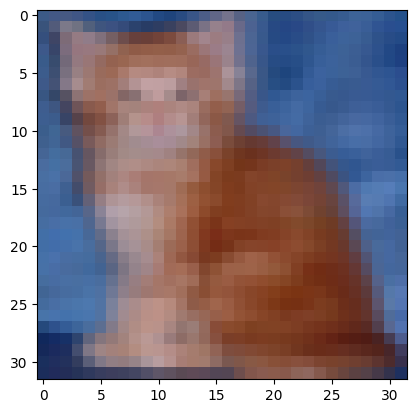

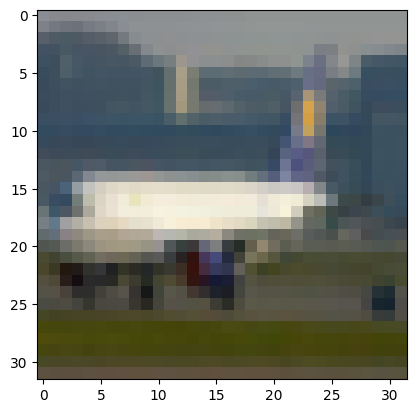

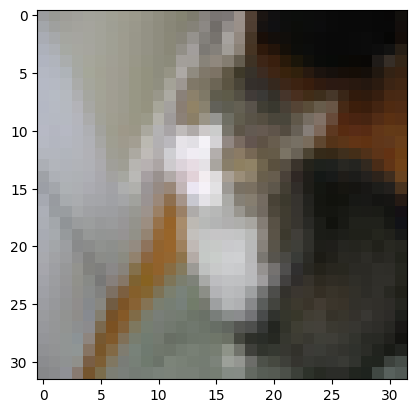

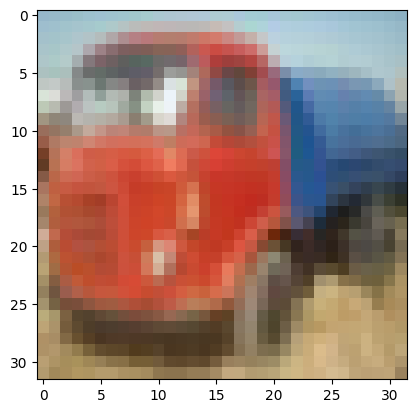

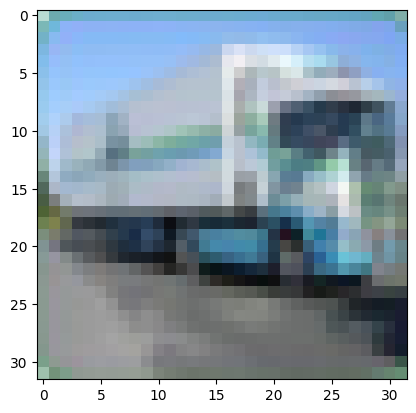

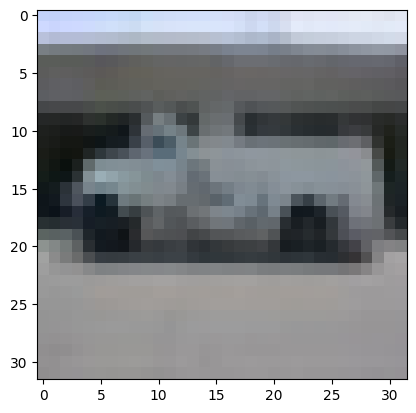

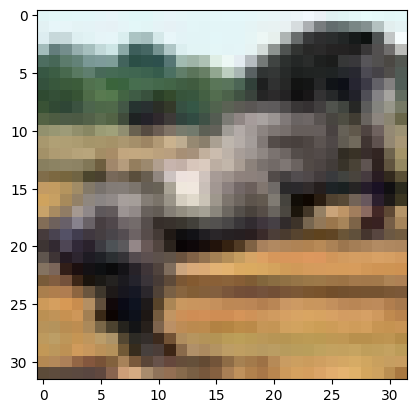

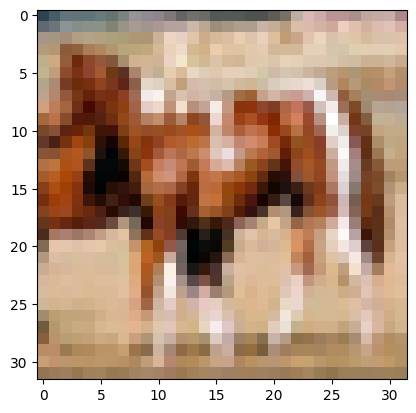

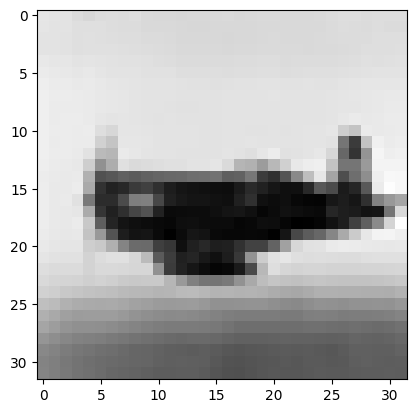

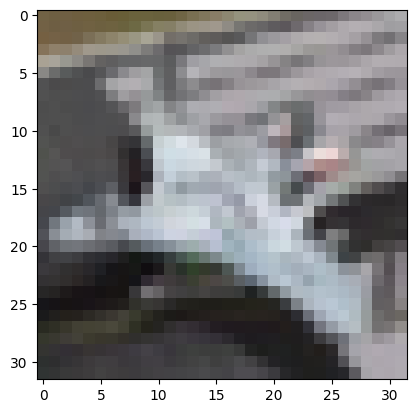

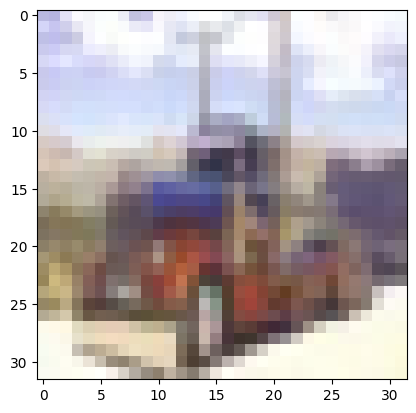

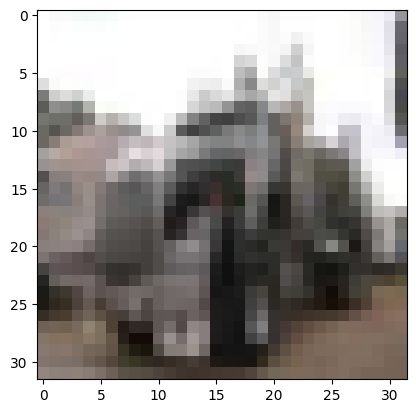

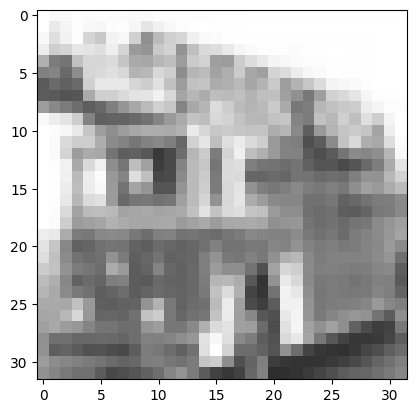

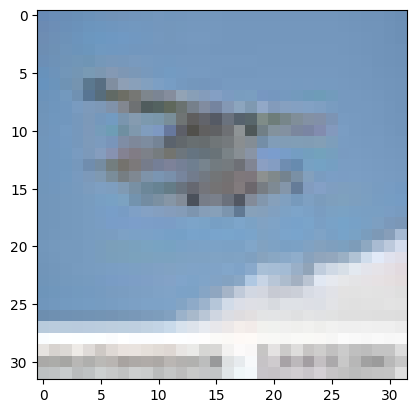

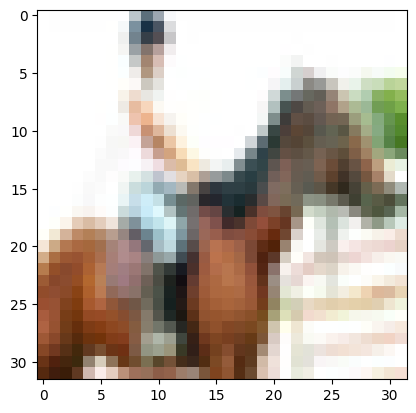

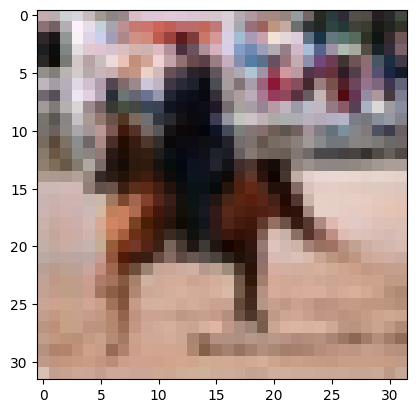

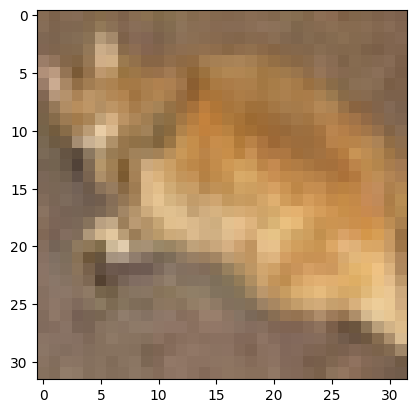

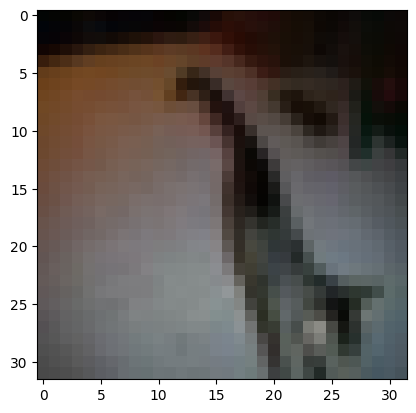

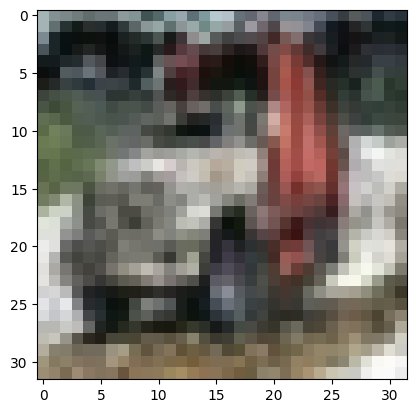

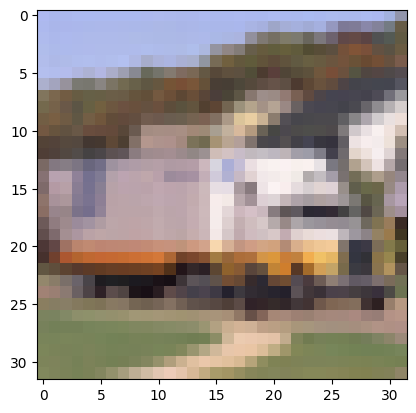

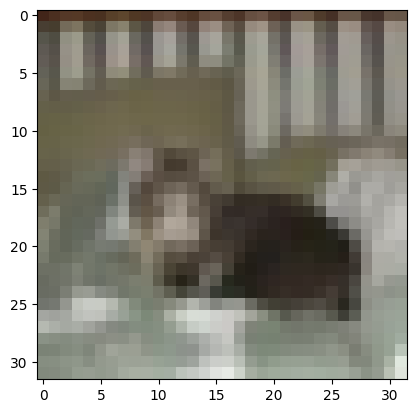

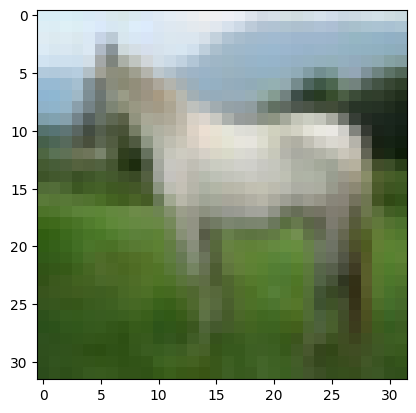

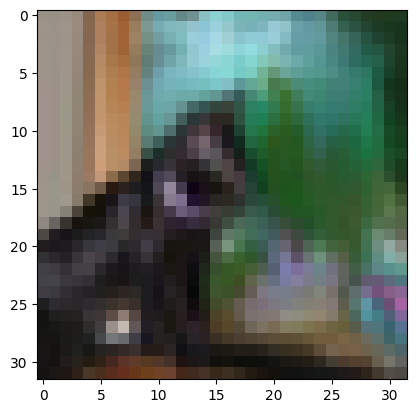

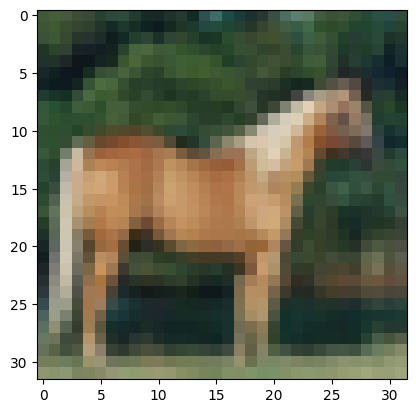

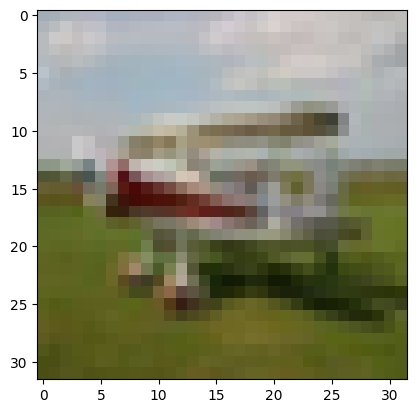

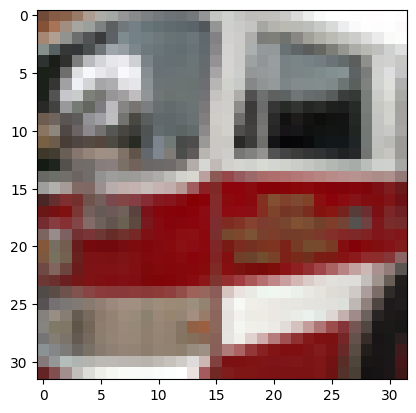

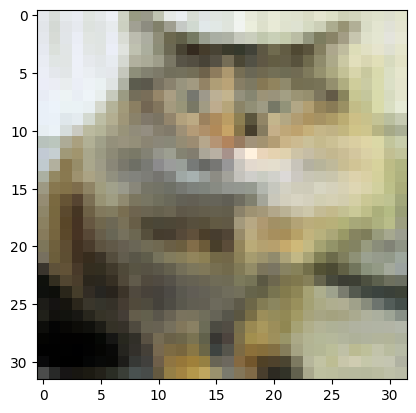

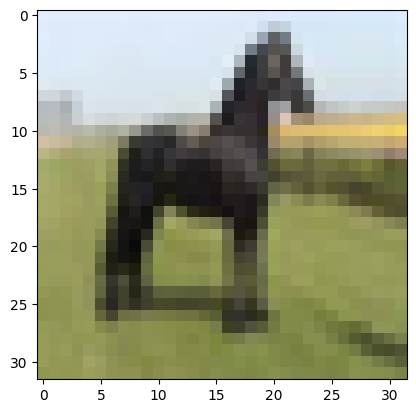

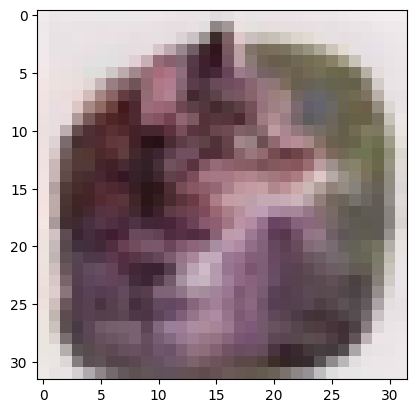

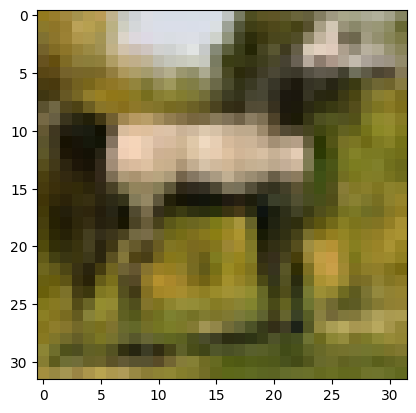

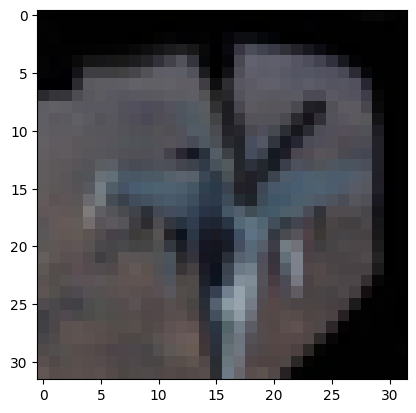

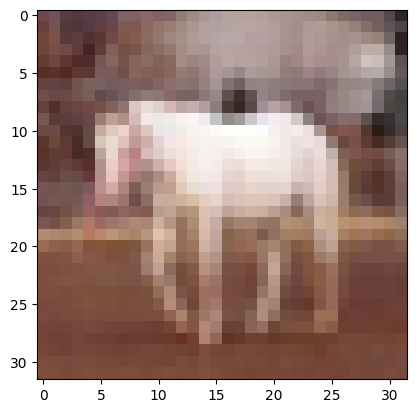

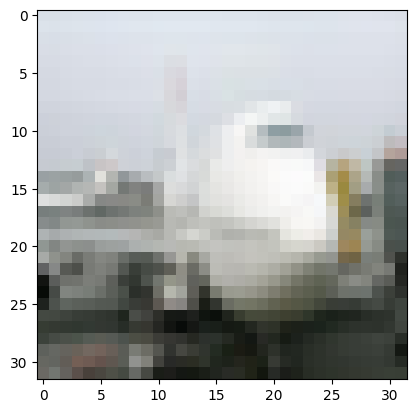

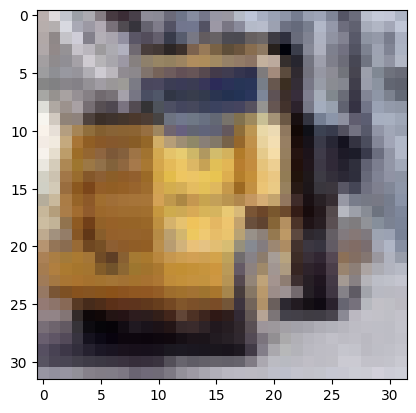

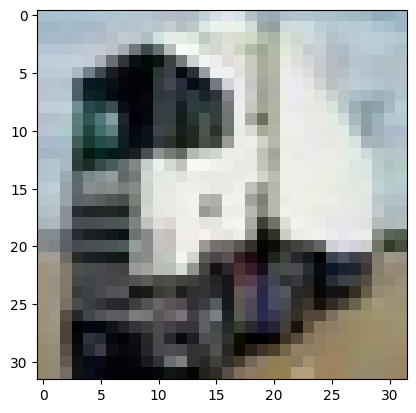

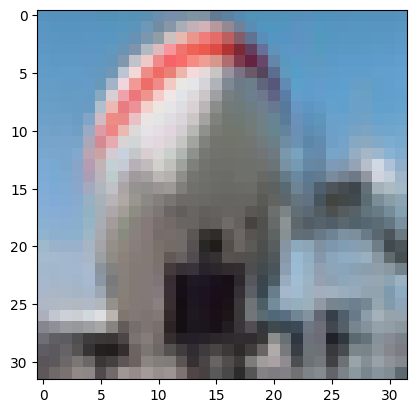

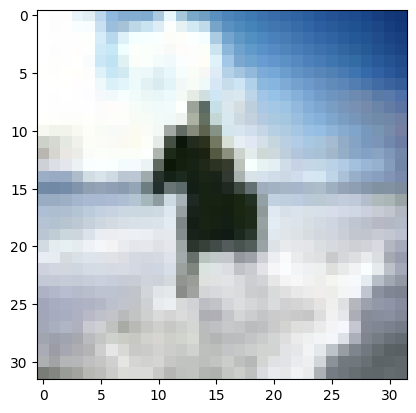

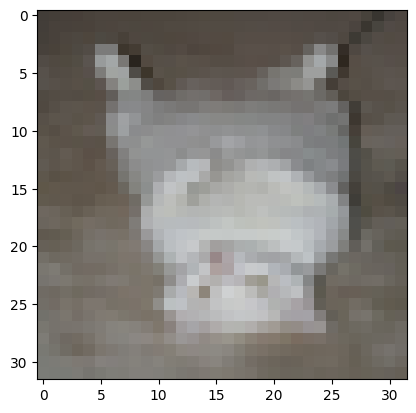

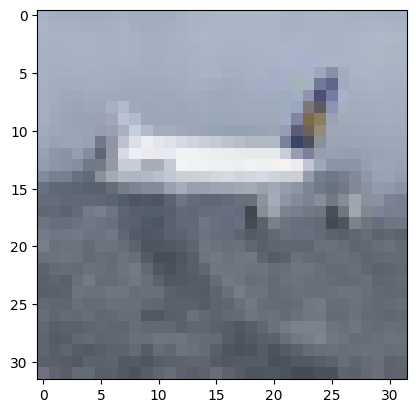

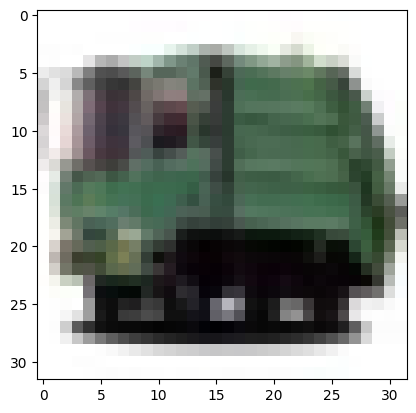

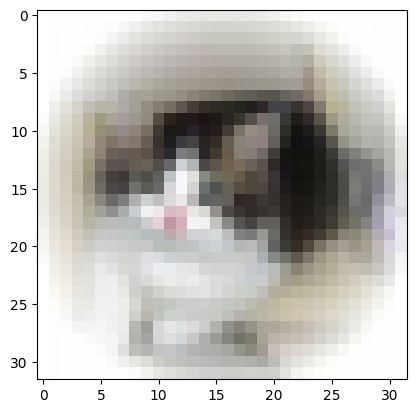

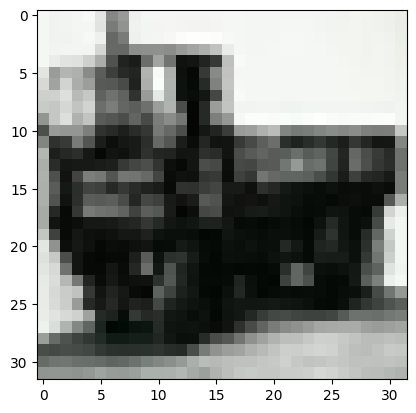

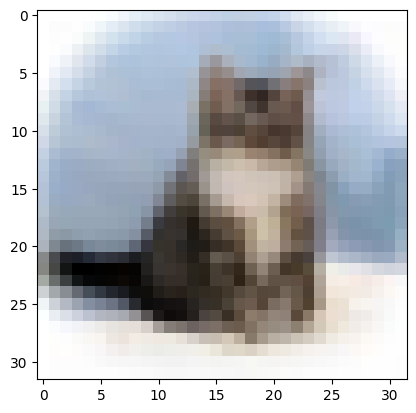

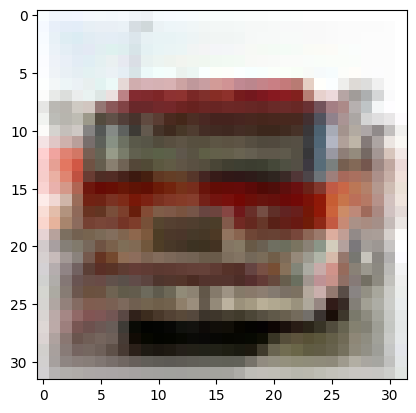

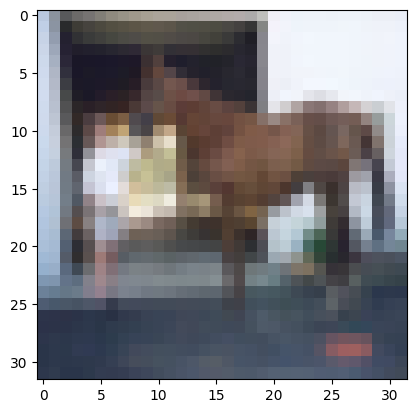

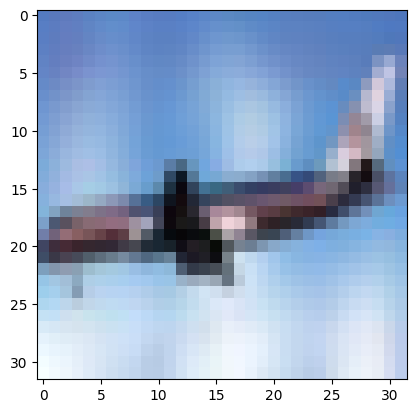

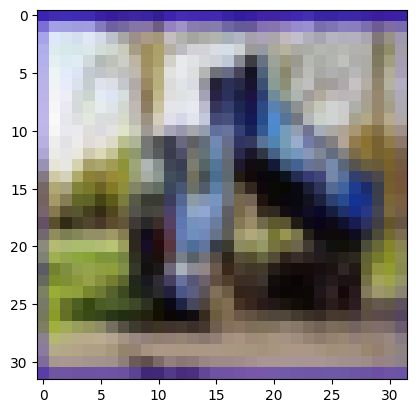

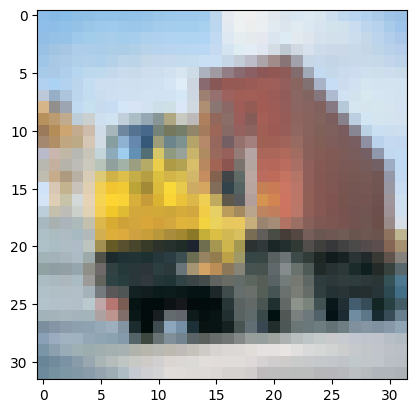

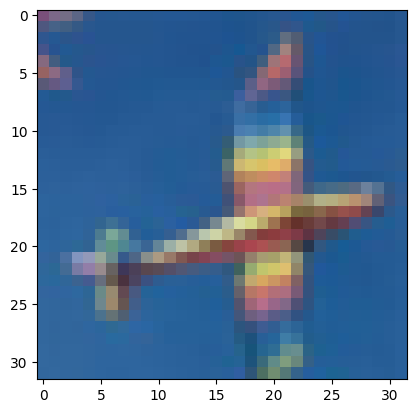

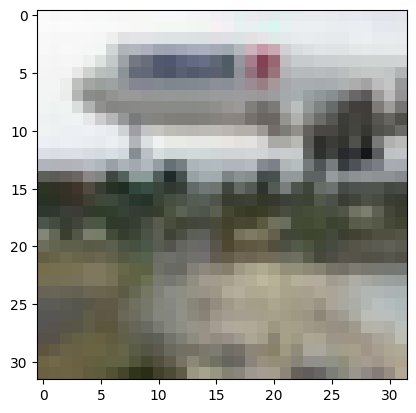

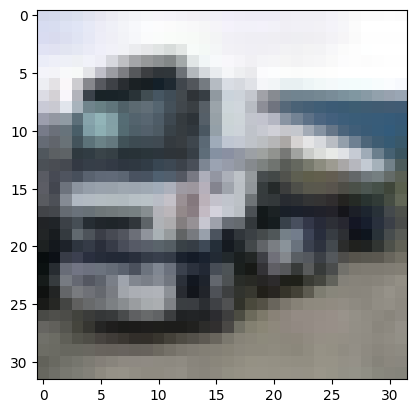

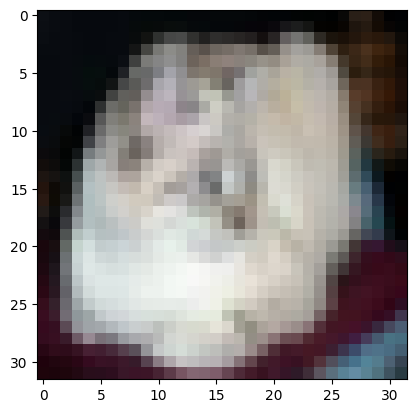

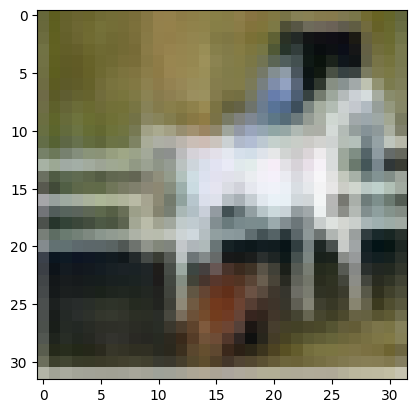

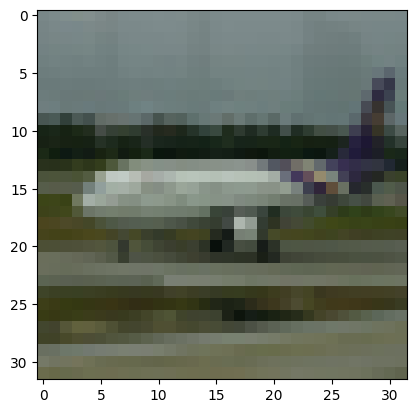

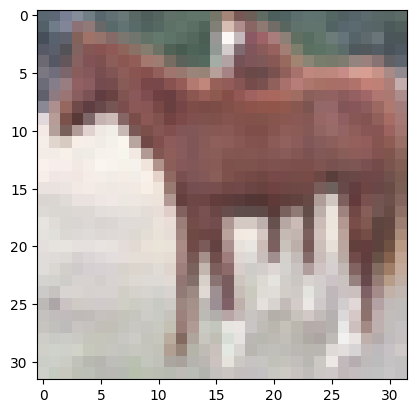

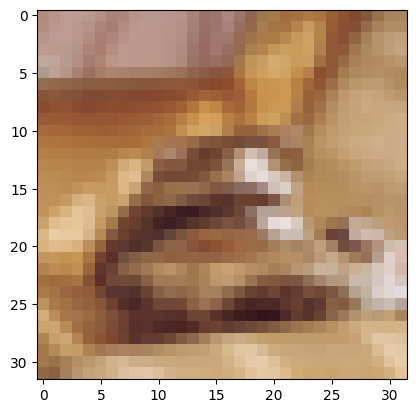

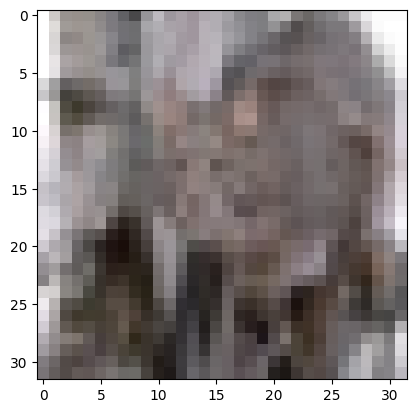

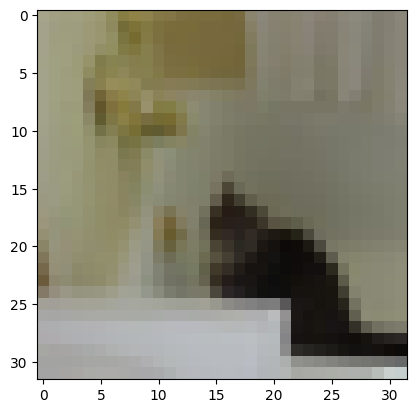

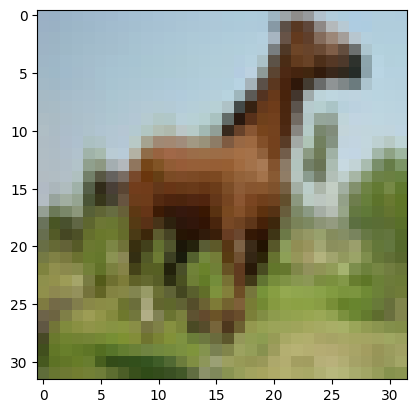

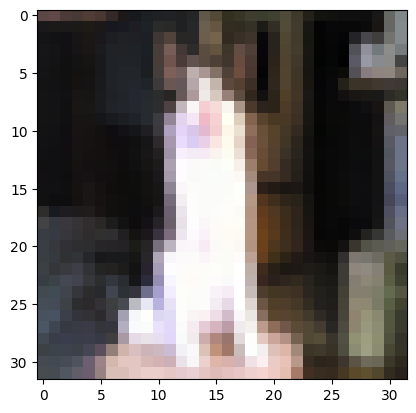

In [36]:
# data is 32x32x3 show image 
def save_image(data, i):
    data = data.reshape(32, 32, 3)
    plt.imshow(data)
    # save image
    # plt.savefig(f"imgs/{i}.png")
    # show image
    plt.show()

for i in range(0, 100):
    save_image(dataset[i], i)